In [54]:
%%bash
access_token=$(curl --form client_id=3MVG92.uWdyphVj6UxPnhEXcGWKGUulhD6t5MX22jFwh.vpvswh0ugzWTNdzfKkS9WPOB0N4zuzx5pircZKrH     --form client_secret=6187037629736038946     --form grant_type=password --form username=argus-api@gus.com --form password=il0vesfdc20\!6  https://gus.my.salesforce.com/services/oauth2/token | grep -Po "(?<=access_token: )[^,]*")


usage: grep [-abcDEFGHhIiJLlmnOoqRSsUVvwxZ] [-A num] [-B num] [-C[num]]
	[-e pattern] [-f file] [--binary-files=value] [--color=when]
	[--context[=num]] [--directories=action] [--label] [--line-buffered]
	[--null] [pattern] [file ...]
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1045    0   364  100   681    275    515  0:00:01  0:00:01 --:--:--   516
(23) Failed writing body


In [60]:
%%bash
curl --form client_id=3MVG92.uWdyphVj6UxPnhEXcGWKGUulhD6t5MX22jFwh.vpvswh0ugzWTNdzfKkS9WPOB0N4zuzx5pircZKrH     --form client_secret=6187037629736038946     --form grant_type=password --form username=argus-api@gus.com --form password=il0vesfdc2017\!  https://gus.my.salesforce.com/services/oauth2/token|\
    python3 -c "import sys, json; print(json.load(sys.stdin)['access_token'])"


00DT0000000Dpvc!AQYAQAc77PynXIR0i95R2UJSfLXHk1ufvQyB6t3r8fD2mBAxYy2Ok9LllkC1BLqFGUZDbGByuDVk67jn2_WVj4YV9d1twLzl


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1045    0   364  100   681    532    995 --:--:-- --:--:-- --:--:--   997


In [24]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
import subprocess
import sys, json
from IPython.display import display, HTML
import html

#generate access token
client_id ='3MVG92.uWdyphVj6UxPnhEXcGWKGUulhD6t5MX22jFwh.vpvswh0ugzWTNdzfKkS9WPOB0N4zuzx5pircZKrH'
client_secret='6187037629736038946'
grant_type='password'
username='argus-api@gus.com'
password="il0vesfdc20!6"
oauth_url="https://gus.my.salesforce.com/services/oauth2/token"
oauth_curl ="curl --form client_id={0} --form client_secret={1} --form grant_type={2} --form username={3} --form password={4} {5}".format(client_id, client_secret, grant_type, username, password, oauth_url)

s = subprocess.run(oauth_curl, shell=True, check=True, stdout=subprocess.PIPE)
#print(s.stdout)

#send out request to gus
access_token = json.loads(s.stdout.decode("utf-8"))['access_token']
dva_feed_url="https://gus.my.salesforce.com//services/data/v38.0/chatter/feeds/record/0F9B00000000K7r/feed-elements?pageSize=100"
feed_curl = "curl -X GET {0} -H 'Authorization: Bearer {1}'".format(dva_feed_url, access_token)

feeds = subprocess.run(feed_curl, shell=True, check=True, stdout=subprocess.PIPE)
#print(feeds.stdout.decode("utf-8"))

def process_time(time_str):
    import dateutil.parser
    parse_iso8601 = dateutil.parser.parse(time_str)
    return pd.Timestamp(parse_iso8601).tz_convert('US/Pacific')

feed_json = json.loads(feeds.stdout.decode("utf-8"))
###############just in case
# with open('feed.json', 'w') as outfile:
#     json.dump(feed_json, outfile)
# with open('feed.json') as infile:    
#     data = json.load(infile)
# feed_json = data   
# print(feed_json)
#############################
#parse returned json
feed_actor,feed_createdDate,feed_content,feed_id = [],[],[],[]
comment_user, comment_createdDate, comment_content, comment_feed_id = [],[],[],[]
comment_total, like_total=[],[]
for element in feed_json['elements']:
    feed_actor.append(element['actor']['displayName'])
    feed_createdDate.append(process_time(element['createdDate']))
    feed_content.append(element['body']['text'])
    feed_id.append(element['id'])
    
    comment_total.append(element['capabilities']['comments']['page']['total'])
    like_total.append(element['capabilities']['chatterLikes']['page']['total'])
    
    for item in element['capabilities']['comments']['page']['items']:
        comment_user.append(item['user']['displayName'])
        comment_createdDate.append(process_time(item['createdDate']))
        comment_content.append(item['body']['text'])
        comment_feed_id.append(item['feedElement']['id'])
        


# Table of all DVA Chatter Group feeds

In [26]:
feed_df = pd.DataFrame([feed_actor,feed_createdDate,feed_content,feed_id]).T
feed_df.columns = ['feed_actor', 'feed_createdDate','feed_content','feed_id']
feed_df['feed_content']=feed_df['feed_content'].apply(lambda x:'' if x is None else html.unescape(x))

display(feed_df)

,feed_actor,feed_createdDate,feed_content,feed_id
0,Xiaolan Shen,2017-01-14 10:09:04-08:00,Splunk Update - 01.14 \n \n1. Index lag incid...,0D5B000000Qg6n6KAB
1,Sanjeev Sahu,2017-01-13 19:43:49-08:00,@Winters Lu Congratulations on your 2nd annive...,0D5B000000QVWixKAH
2,Rupesh Khandelwal,2017-01-12 09:35:29-08:00,Splunk Update - 01.12\n \nSummary\n- Increase ...,0D5B000000QfeQrKAJ
3,Shouvik Mondal,2017-01-12 09:32:47-08:00,@DVA @Argus \n \nData has stopped flowing into...,0D5B000000QfeNJKAZ
4,Vani Kumar,2017-01-12 09:25:04-08:00,Notice of Graphite and Seyren Shutdown\nThis i...,0D5B000000QVLN0KAP
5,Rupesh Khandelwal,2017-01-09 11:44:44-08:00,Splunk Update - 01.09\n \nWeekly Performance &...,0D5B000000Qa9wSKAR
6,Bhupesh Patel,2017-01-06 13:44:12-08:00,We are planning to push system metrics from ou...,0D5B000000QccrdKAB
7,Sarat Nath,2017-01-06 12:55:47-08:00,Here is IAD/ORD SP1 build BoM presentation:\nh...,0D5B000000QccOAKAZ
8,Christopher Nardi,2017-01-06 10:17:38-08:00,Here is our QA and release schedule to replace...,0D5B000000QZoC7KAL
9,Devaraj Nandogopal,2017-01-05 19:00:32-08:00,Hi\n \nWe are from perfinfra team under ICE Cl...,0D5B000000QcUaOKAV


# Table of all DVA Chatter Group comments

In [37]:
comment_df = pd.DataFrame([comment_user,comment_createdDate,comment_content,comment_feed_id]).T
comment_df.columns = ['comment_user', 'comment_createdDate','comment_content','comment_feed_id']
comment_df['comment_content']=comment_df['comment_content'].apply(lambda x:'' if x is None else html.unescape(x))

display(comment_df)

,comment_user,comment_createdDate,comment_content,comment_feed_id
0,Xiaolan Shen,2017-01-14 10:12:24-08:00,Core app indexing workload (log volume) distri...,0D5B000000Qg6n6KAB
1,Mark Nelson,2017-01-13 22:02:37-08:00,Congratulations @Winters Lu !,0D5B000000QVWixKAH
2,Winters Lu,2017-01-14 03:01:54-08:00,Thanks @Mark Nelson and @Sanjeev Sahu Glad to ...,0D5B000000QVWixKAH
3,John O&#39;Brien,2017-01-13 16:46:45-08:00,What was the index lag today? especially aroun...,0D5B000000QfeQrKAJ
4,Nagraj Kulkarni,2017-01-13 17:04:52-08:00,John ..\n\nI am looking into this right now.,0D5B000000QfeQrKAJ
5,Nagraj Kulkarni,2017-01-13 17:25:38-08:00,@John O'Brien you are right .. Indexing activi...,0D5B000000QfeQrKAJ
6,Michael Lacey,2017-01-13 14:46:32-08:00,@Nishant Gupta @Robert Wyatt I spoke briefly w...,0D5B000000QfeNJKAZ
7,Nishant Gupta,2017-01-13 14:50:05-08:00,Thanks @Michael Lacey ! We will look and see w...,0D5B000000QfeNJKAZ
8,Michael Lacey,2017-01-13 14:51:23-08:00,Absolutely. Hoping this can help provide conte...,0D5B000000QfeNJKAZ
9,Vani Kumar,2017-01-12 09:25:29-08:00,@DVA Notifications @DVA @Argus,0D5B000000QVLN0KAP


# Put everything together

In [29]:
comment_df.columns=['user','createdDate','comment_content','feed_id']

feed_df.columns=['user','createdDate','comment_content','feed_id']
total_df = feed_df.append(comment_df)

display(total_df)

,user,createdDate,comment_content,feed_id
0,Xiaolan Shen,2017-01-14 10:09:04-08:00,Splunk Update - 01.14 \n \n1. Index lag incid...,0D5B000000Qg6n6KAB
1,Sanjeev Sahu,2017-01-13 19:43:49-08:00,@Winters Lu Congratulations on your 2nd annive...,0D5B000000QVWixKAH
2,Rupesh Khandelwal,2017-01-12 09:35:29-08:00,Splunk Update - 01.12\n \nSummary\n- Increase ...,0D5B000000QfeQrKAJ
3,Shouvik Mondal,2017-01-12 09:32:47-08:00,@DVA @Argus \n \nData has stopped flowing into...,0D5B000000QfeNJKAZ
4,Vani Kumar,2017-01-12 09:25:04-08:00,Notice of Graphite and Seyren Shutdown\nThis i...,0D5B000000QVLN0KAP
5,Rupesh Khandelwal,2017-01-09 11:44:44-08:00,Splunk Update - 01.09\n \nWeekly Performance &...,0D5B000000Qa9wSKAR
6,Bhupesh Patel,2017-01-06 13:44:12-08:00,We are planning to push system metrics from ou...,0D5B000000QccrdKAB
7,Sarat Nath,2017-01-06 12:55:47-08:00,Here is IAD/ORD SP1 build BoM presentation:\nh...,0D5B000000QccOAKAZ
8,Christopher Nardi,2017-01-06 10:17:38-08:00,Here is our QA and release schedule to replace...,0D5B000000QZoC7KAL
9,Devaraj Nandogopal,2017-01-05 19:00:32-08:00,Hi\n \nWe are from perfinfra team under ICE Cl...,0D5B000000QcUaOKAV


# On which day of the week people like posting in DVA Chatter Group most?

,,feed_total
weekday,weekday_name,
0,Monday,53
1,Tuesday,55
2,Wednesday,61
3,Thursday,55
4,Friday,62
5,Saturday,4
6,Sunday,12


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10df8a9e8>], dtype=object)

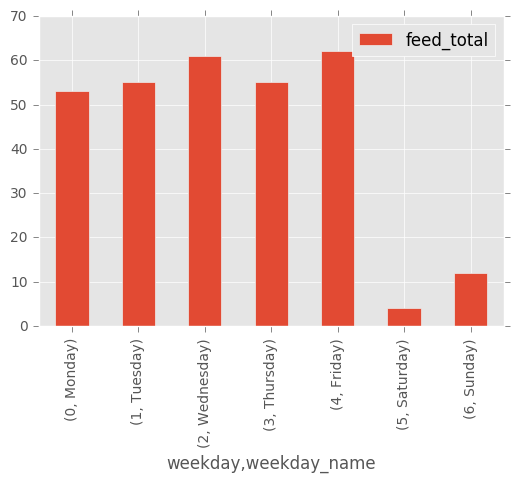

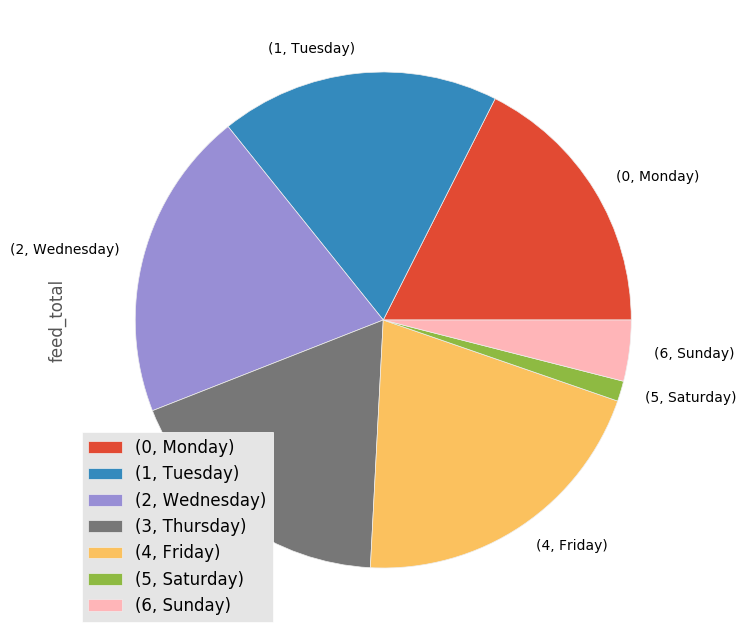

In [30]:
total_df['weekday'] = total_df['createdDate'].dt.weekday
total_df['weekday_name'] = total_df['createdDate'].dt.weekday_name

total_weekday_df = total_df[['weekday','weekday_name','feed_id']].groupby(['weekday','weekday_name']).count().rename(columns={'feed_id':'feed_total'})
display(total_weekday_df)

total_weekday_df.plot.bar()
total_weekday_df.plot.pie(subplots=True, figsize=(8, 8))


# During which hour of the day people like posting in DVA Chatter Group most?

,feed_total
hour,
0,2
1,3
2,1
3,4
4,1
5,3
6,5
7,13
8,17


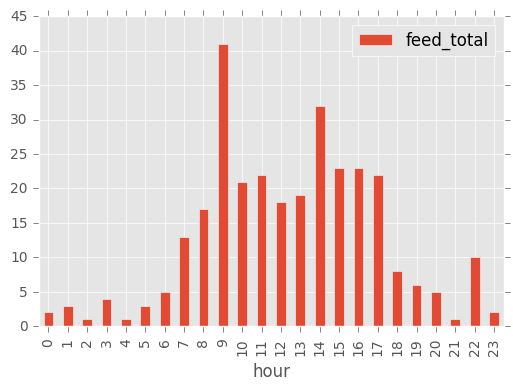

In [31]:
total_df['hour'] = total_df['createdDate'].dt.hour
total_hour_df = total_df[['hour','feed_id']].groupby('hour').count().rename(columns={'feed_id':'feed_total'})
display(total_hour_df)
total_hour_df.plot.bar()

# People prefer posting in AM or in PM?

/Users/rzhang/py3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,feed_total
am/pm,
am,109
pm,193


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d08bb70>], dtype=object)

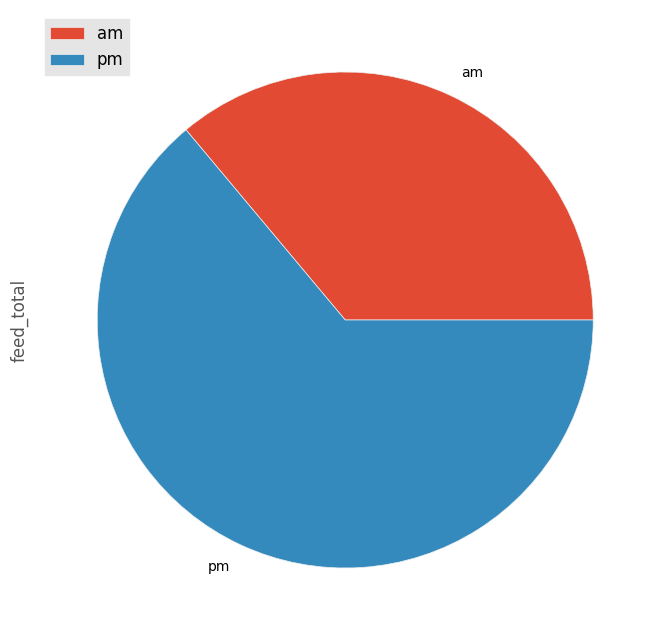

In [32]:
total_df['hour'] = total_df['createdDate'].dt.hour
am_pm_df=total_df[['hour','feed_id']]

am_pm_df['am/pm'] = am_pm_df['hour'].apply(lambda x: 'am' if x in range(1,11) else 'pm')
total_am_pm_df = am_pm_df.groupby('am/pm').count().rename(columns={'feed_id':'feed_total'}).drop('hour',1)

display(total_am_pm_df)
total_am_pm_df.plot.pie(subplots=True, figsize=(8, 8))


# Which feed has most comments and most likes?

In [33]:
popular_df = pd.DataFrame([feed_id, feed_actor, feed_createdDate, feed_content, comment_total, like_total]).T
popular_df.columns = ['feed_id', 'feed_actor', 'feed_createdDate', 'feed_content', 'comment_total', 'like_total']
popular_df['popular_score'] = popular_df.comment_total + popular_df.like_total

sorted_popular_df = popular_df.sort_values(by='popular_score',ascending=False).reset_index(drop=True)
display(sorted_popular_df)

,feed_id,feed_actor,feed_createdDate,feed_content,comment_total,like_total,popular_score
0,0D5B000000ECf5UKAT,Mark Nelson,2016-12-05 14:55:55-08:00,Congratulations to @Vaishali Nandal on her pro...,56,28,84
1,0D5B000000QH4GKKA1,Mary Birrell,2016-12-06 09:02:48-08:00,I am extremely happy to announce @Jessica Cox ...,38,25,63
2,0D5B000000QG3IMKA1,Reena Mathew,2016-11-30 06:06:32-08:00,Service Discovery\n \nCompute Deploy Cloud has...,44,15,59
3,0D5B000000QNtjnKAD,Yoni Michael,2016-12-20 17:52:57-08:00,Coolan is open for business!\n \nHappy Holiday...,29,17,46
4,0D5B000000QJEaCKAX,Sarat Nath,2016-12-18 23:51:49-08:00,\nHi Service owners\nPlease have a look at th...,37,8,45
5,0D5B000000EACPPKA5,Seth Katz,2016-11-10 11:03:17-08:00,The amazing @Lauren Padia has been a full tim...,23,19,42
6,0D5B000000QI4eNKAT,Maya Nyayapati,2016-12-12 15:25:36-08:00,Who owns the collectd installation for @Molson...,30,5,35
7,0D5B000000QD7YQKA1,Xiaolan Shen,2016-11-17 09:30:18-08:00,Splunk Update - 11.17\n \nSplunk saw a log vol...,24,10,34
8,0D5B000000QGRG3KAP,"Christophe Bichaut - PTO (Jan 13, 2017)",2016-12-02 07:37:23-08:00,** Scheduled srd/bastion restart **\n \nA patc...,25,3,28
9,0D5B000000QUB0WKAX,Tom Valine,2016-12-28 13:02:20-08:00,The New Year is upon us and I just wanted to s...,8,20,28


# Whose feed is most populare? Whose feed is least popular?

,feed_actor,comment_total,like_total,popular_score
0,Mark Nelson,56,28,84
1,Kirankumar Gowdru,56,12,68
2,Mary Birrell,38,26,64
3,Reena Mathew,44,15,59
4,Sarat Nath,43,10,53
5,Shouvik Mondal,45,2,47
6,Yoni Michael,29,17,46
7,Xiaolan Shen,30,13,43
8,Seth Katz,23,19,42
9,"Christophe Bichaut - PTO (Jan 13, 2017)",35,5,40


Populating the interactive namespace from numpy and matplotlib


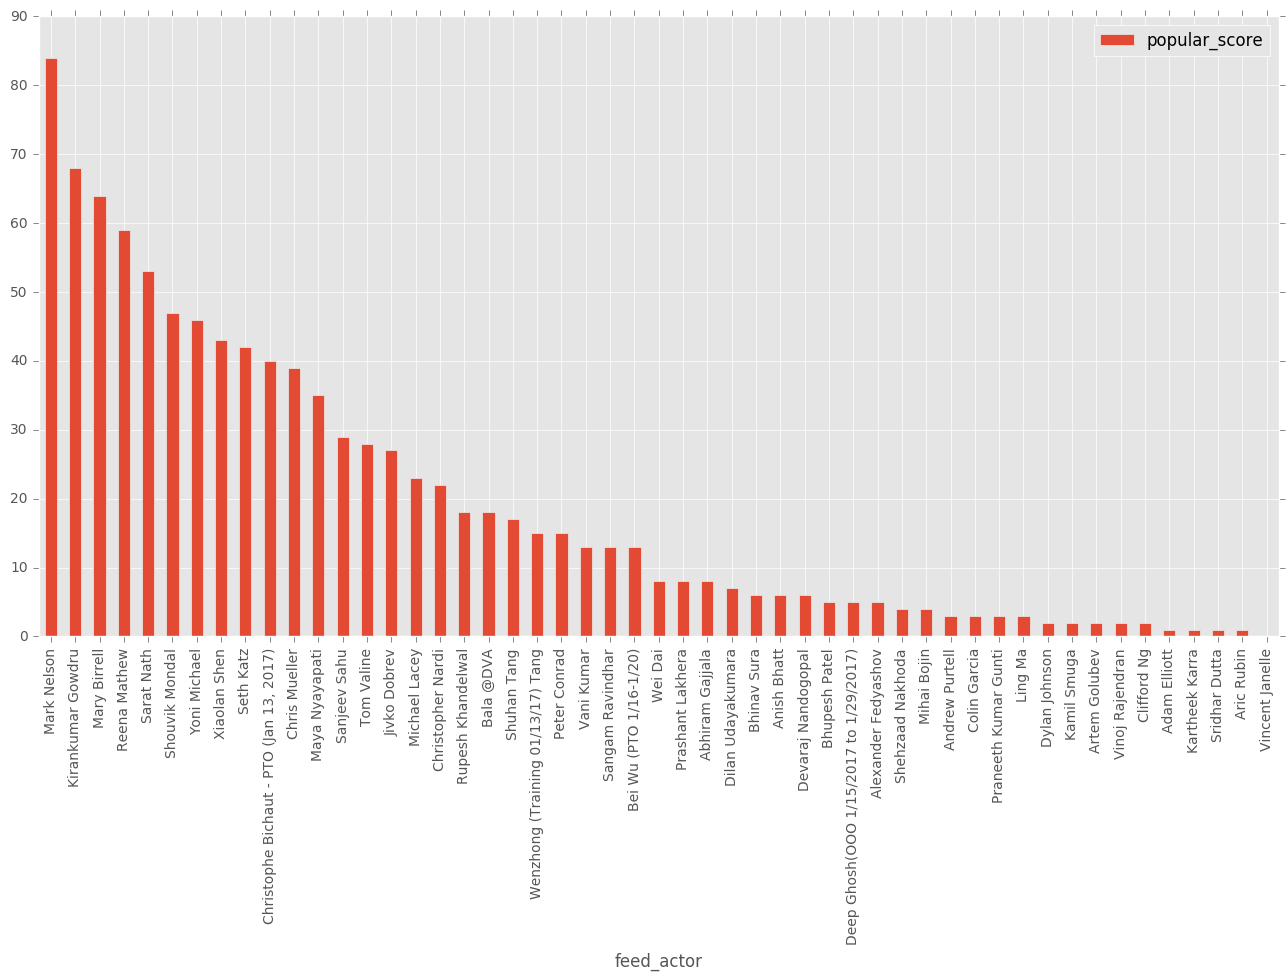

In [34]:
popular_king_df = sorted_popular_df.groupby('feed_actor')[["comment_total","like_total","popular_score"]].sum().sort_values(by="popular_score", ascending=False).reset_index()
display(popular_king_df)
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
popular_king_df.plot.bar(x='feed_actor',y='popular_score')

#popular_king_df.head(20).plot()

# Who commented on your feed?

In [35]:
#comment_df feed_df cols are changed when appending, change it back
feed_df.columns = ['feed_actor', 'feed_createdDate','feed_content','feed_id']
comment_df.columns = ['comment_user', 'comment_createdDate','comment_content','comment_feed_id']

feed_relation = feed_df.loc[:, lambda df: ['feed_actor', 'feed_id','feed_content', 'feed_createdDate']]
comment_relations = comment_df.loc[:, lambda df: ['comment_user', 'comment_feed_id','comment_createdDate']]

feed_comment_relation = pd.merge(feed_relation, comment_relations, how = 'left', left_on = 'feed_id', right_on = 'comment_feed_id')
display(feed_comment_relation)
#print(type(feed_comment_relation['feed_actor'].tolist()))
#print(list(zip(feed_comment_relation['feed_actor'].tolist(), feed_comment_relation['comment_user'].tolist())))
tuples = list(zip(feed_comment_relation['feed_id'].tolist(), 
                  feed_comment_relation['feed_content'].tolist(),
                  feed_comment_relation['feed_actor'].tolist(),
                  feed_comment_relation['feed_createdDate'].tolist(),
                  feed_comment_relation['comment_user'].tolist()))
index = pd.MultiIndex.from_tuples(tuples, names=['feed_id','feed_content','feed_actor', 'feed_createdDate', 'comment_user'])
relationship_reshape = pd.DataFrame(list(feed_comment_relation['comment_createdDate']), index=index, columns=['comment_createdDate'])

display(relationship_reshape)

,feed_actor,feed_id,feed_content,feed_createdDate,comment_user,comment_feed_id,comment_createdDate
0,Xiaolan Shen,0D5B000000Qg6n6KAB,Splunk Update - 01.14 \n \n1. Index lag incid...,2017-01-14 10:09:04-08:00,Xiaolan Shen,0D5B000000Qg6n6KAB,2017-01-14 10:12:24-08:00
1,Sanjeev Sahu,0D5B000000QVWixKAH,@Winters Lu Congratulations on your 2nd annive...,2017-01-13 19:43:49-08:00,Mark Nelson,0D5B000000QVWixKAH,2017-01-13 22:02:37-08:00
2,Sanjeev Sahu,0D5B000000QVWixKAH,@Winters Lu Congratulations on your 2nd annive...,2017-01-13 19:43:49-08:00,Winters Lu,0D5B000000QVWixKAH,2017-01-14 03:01:54-08:00
3,Rupesh Khandelwal,0D5B000000QfeQrKAJ,Splunk Update - 01.12\n \nSummary\n- Increase ...,2017-01-12 09:35:29-08:00,John O&#39;Brien,0D5B000000QfeQrKAJ,2017-01-13 16:46:45-08:00
4,Rupesh Khandelwal,0D5B000000QfeQrKAJ,Splunk Update - 01.12\n \nSummary\n- Increase ...,2017-01-12 09:35:29-08:00,Nagraj Kulkarni,0D5B000000QfeQrKAJ,2017-01-13 17:04:52-08:00
5,Rupesh Khandelwal,0D5B000000QfeQrKAJ,Splunk Update - 01.12\n \nSummary\n- Increase ...,2017-01-12 09:35:29-08:00,Nagraj Kulkarni,0D5B000000QfeQrKAJ,2017-01-13 17:25:38-08:00
6,Shouvik Mondal,0D5B000000QfeNJKAZ,@DVA @Argus \n \nData has stopped flowing into...,2017-01-12 09:32:47-08:00,Michael Lacey,0D5B000000QfeNJKAZ,2017-01-13 14:46:32-08:00
7,Shouvik Mondal,0D5B000000QfeNJKAZ,@DVA @Argus \n \nData has stopped flowing into...,2017-01-12 09:32:47-08:00,Nishant Gupta,0D5B000000QfeNJKAZ,2017-01-13 14:50:05-08:00
8,Shouvik Mondal,0D5B000000QfeNJKAZ,@DVA @Argus \n \nData has stopped flowing into...,2017-01-12 09:32:47-08:00,Michael Lacey,0D5B000000QfeNJKAZ,2017-01-13 14:51:23-08:00
9,Vani Kumar,0D5B000000QVLN0KAP,Notice of Graphite and Seyren Shutdown\nThis i...,2017-01-12 09:25:04-08:00,Vani Kumar,0D5B000000QVLN0KAP,2017-01-12 09:25:29-08:00


comment_createdDate
feed_id            feed_content                                       feed_actor                              feed_createdDate          comment_user                                                     
0D5B000000Qg6n6KAB Splunk Update - 01.14 \n \n1.  Index lag incide... Xiaolan Shen                            2017-01-14 10:09:04-08:00 Xiaolan Shen                            2017-01-14 10:12:24-08:00
0D5B000000QVWixKAH @Winters Lu Congratulations on your 2nd anniver... Sanjeev Sahu                            2017-01-13 19:43:49-08:00 Mark Nelson                             2017-01-13 22:02:37-08:00
                                                                                                                                        Winters Lu                              2017-01-14 03:01:54-08:00
0D5B000000QfeQrKAJ Splunk Update - 01.12\n \nSummary\n- Increase o... Rupesh Khandelwal                       2017-01-12 09:35:29-08:00 John O&#39;Brien                        2017-01-13 16:46:45-08:00
                                                                                                                                        Nagraj Kulkarni                         2017-01-13 17:04:52-08:00
                                                                                                                                        Nagraj Kulkarni                         2017-01-13 17:25:38-08:00
0D5B000000QfeNJKAZ @DVA @Argus \n \nData has stopped flowing into ... Shouvik Mondal                          2017-01-12 09:32:47-08:00 Michael Lacey                           2017-01-13 14:46:32-08:00
                                                                                                                                        Nishant Gupta                           2017-01-13 14:50:05-08:00
                                                                                                                                        Michael Lacey                           2017-01-13 14:51:23-08:00
0D5B000000QVLN0KAP Notice of Graphite and Seyren Shutdown\nThis is... Vani Kumar                              2017-01-12 09:25:04-08:00 Vani Kumar                              2017-01-12 09:25:29-08:00
0D5B000000Qa9wSKAR Splunk Update - 01.09\n \nWeekly Performance & ... Rupesh Khandelwal                       2017-01-09 11:44:44-08:00 Rupesh Khandelwal                       2017-01-09 11:49:46-08:00
0D5B000000QccrdKAB We are planning to push system metrics from our... Bhupesh Patel                           2017-01-06 13:44:12-08:00 Wei Li                                  2017-01-09 14:43:19-08:00
                                                                                                                                        Bhupesh Patel                           2017-01-10 15:04:39-08:00
                                                                                                                                        Wei Li                                  2017-01-10 16:35:24-08:00
0D5B000000QccOAKAZ Here is IAD/ORD SP1 build BoM presentation:\nht... Sarat Nath                              2017-01-06 12:55:47-08:00 Tien Tran                               2017-01-06 13:00:40-08:00
                                                                                                                                        Sarat Nath                              2017-01-06 13:03:23-08:00
0D5B000000QZoC7KAL Here is our QA and release schedule to replace ... Christopher Nardi                       2017-01-06 10:17:38-08:00 Nate Moser                              2017-01-06 12:27:56-08:00
                                                                                                                                        Christopher Nardi                       2017-01-06 12:31:57-08:00
                                                                                                                                        Dean T

# Calculate the lifespan of your feed based on the lastest comment creation time

,feed_id,feed_actor,feed_content,feed_createdDate,comment_user,comment_createdDate,feed_lifespan
0,0D5B000000QDBCdKAP,Shouvik Mondal,@DVA - What is the Funnel URL for PHX/DFW SP3...,2016-11-17 14:47:36-08:00,Shouvik Mondal,2017-01-09 09:08:25-08:00,52 days 18:20:49
1,0D5B000000ECf5UKAT,Mark Nelson,Congratulations to @Vaishali Nandal on her pro...,2016-12-05 14:55:55-08:00,Anjani Gupta,2017-01-03 09:42:15-08:00,28 days 18:46:20
2,0D5B000000QJEaCKAX,Sarat Nath,\nHi Service owners\nPlease have a look at th...,2016-12-18 23:51:49-08:00,Dylan Hingey,2017-01-12 14:25:51-08:00,24 days 14:34:02
3,0D5B000000QG3IMKA1,Reena Mathew,Service Discovery\n \nCompute Deploy Cloud has...,2016-11-30 06:06:32-08:00,Ron Lai,2016-12-21 13:46:00-08:00,21 days 07:39:28
4,0D5B000000QKLV5KAP,Chris Mueller,I'm excited to announce that @Morgan Galpin h...,2016-12-06 14:19:03-08:00,Ian Varley,2016-12-27 08:33:55-08:00,20 days 18:14:52
5,0D5B000000Q9JWYKA3,Sangam Ravindhar,"Hi Team,\nSQL tracing logs are not showing in ...",2016-11-14 07:45:17-08:00,Ke Xu,2016-11-30 16:14:28-08:00,16 days 08:29:11
6,0D5B000000QUB0WKAX,Tom Valine,The New Year is upon us and I just wanted to s...,2016-12-28 13:02:20-08:00,Elliott Robbins,2017-01-13 08:37:11-08:00,15 days 19:34:51
7,0D5B000000QNtjnKAD,Yoni Michael,Coolan is open for business!\n \nHappy Holiday...,2016-12-20 17:52:57-08:00,Jim Walsh,2017-01-03 08:04:47-08:00,13 days 14:11:50
8,0D5B000000QGRG3KAP,"Christophe Bichaut - PTO (Jan 13, 2017)",** Scheduled srd/bastion restart **\n \nA patc...,2016-12-02 07:37:23-08:00,Keith Morgan,2016-12-12 05:23:34-08:00,9 days 21:46:11
9,0D5B000000QI4eNKAT,Maya Nyayapati,Who owns the collectd installation for @Molson...,2016-12-12 15:25:36-08:00,Yogi Kapur,2016-12-20 11:57:25-08:00,7 days 20:31:49


Populating the interactive namespace from numpy and matplotlib


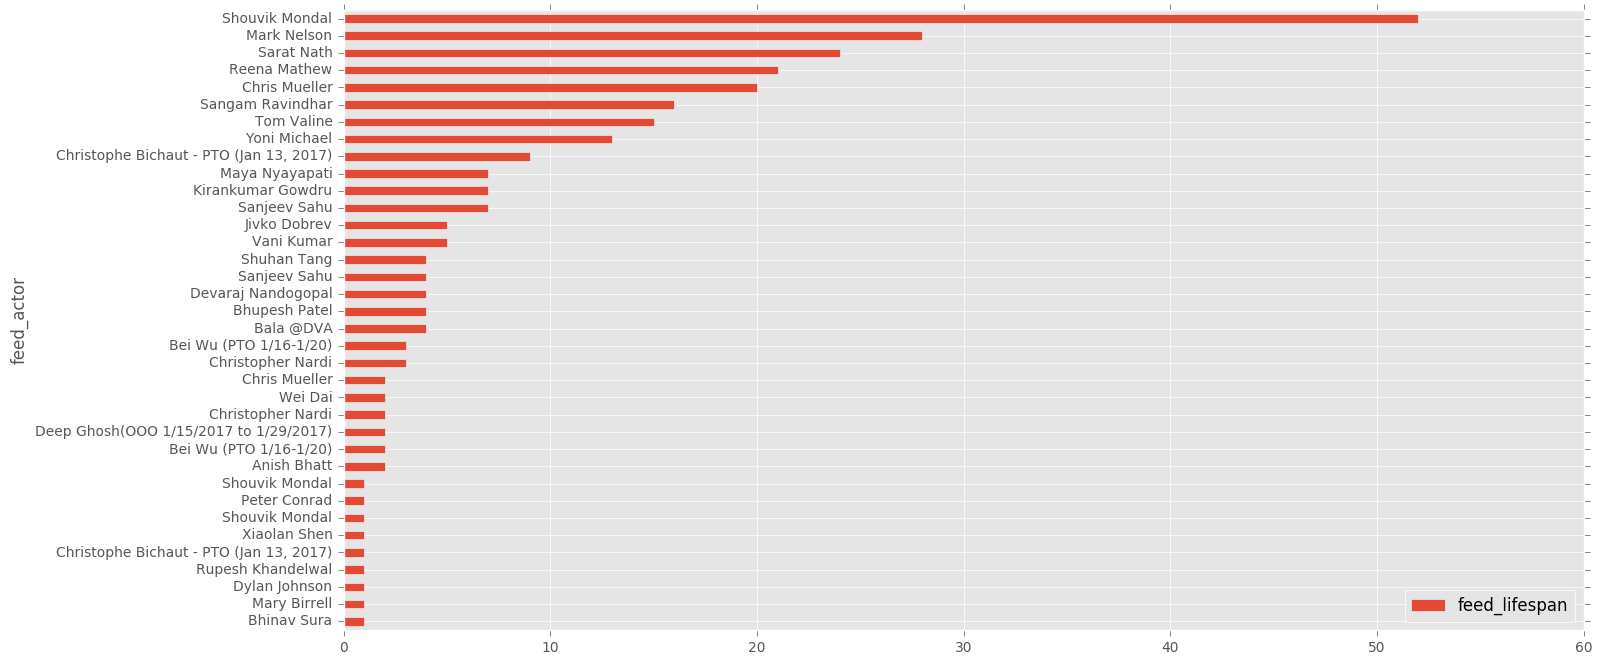

In [36]:
feed_comment_relation['feed_lifespan'] = feed_comment_relation.comment_createdDate - feed_comment_relation.feed_createdDate

sorted_lifespan_df_idx = feed_comment_relation.groupby('feed_id')['feed_lifespan'].transform(max) == feed_comment_relation['feed_lifespan']
sorted_lifespan_df=feed_comment_relation[sorted_lifespan_df_idx][['feed_id','feed_actor','feed_content','feed_createdDate','comment_user','comment_createdDate','feed_lifespan']].sort_values(by='feed_lifespan',ascending=False).reset_index(drop=True)
display(sorted_lifespan_df)

sorted_lifespan_df['feed_lifespan'] = sorted_lifespan_df['feed_lifespan'].dt.days
sorted_lifespan_df = sorted_lifespan_df[(sorted_lifespan_df.feed_lifespan > 0)].sort_values(by='feed_lifespan')
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
sorted_lifespan_df.plot.barh(x='feed_actor',y='feed_lifespan')
